In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy

dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")

## Setup

In [5]:
# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))
period_EA            = dataEA.pl_orbper          # [days]

radius_EA            = dataEA.pl_rade            # [Earth Radius]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.

mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

In [6]:
EA_planets = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<5 and isinstance(st_spectype_EA[i],str) and "M" in st_spectype_EA[i]:
        relative_uncertainty_mass    = (mass_unc_up_EA[i] - mass_unc_low_EA[i]) / (2 * mass_EA[i])
        relative_uncertainty_density = (density_unc_up_EA[i] - density_unc_low_EA[i]) / (2 * density_EA[i])
        if relative_uncertainty_mass < 0.20 and relative_uncertainty_density < 0.20:
            EA_planets.append(planet_name_EA[i])

In [7]:
planet      = []
planet_i    = []
radius      = []
radius_up   = []
radius_low  = []
mass        = []
mass_up     = []
mass_low    = []
density     = []
density_up  = []
density_low = []

for i in range(0,len(EA_planets)):
    index  = list(planet_name_EA).index(EA_planets[i])
    planet.append(dataEA.pl_name[index])
    planet_i.append(i)
    radius.append(dataEA.pl_rade[index])
    radius_up.append(dataEA.pl_radeerr1[index])
    radius_low.append(dataEA.pl_radeerr2[index])
    
    density.append(dataEA.pl_dens[index])
    density_up.append(dataEA.pl_denserr1[index])
    density_low.append(dataEA.pl_denserr2[index])
    
    mass.append(dataEA.pl_bmasse[index])
    mass_up.append(dataEA.pl_bmasseerr1[index])
    mass_low.append(dataEA.pl_bmasseerr2[index])

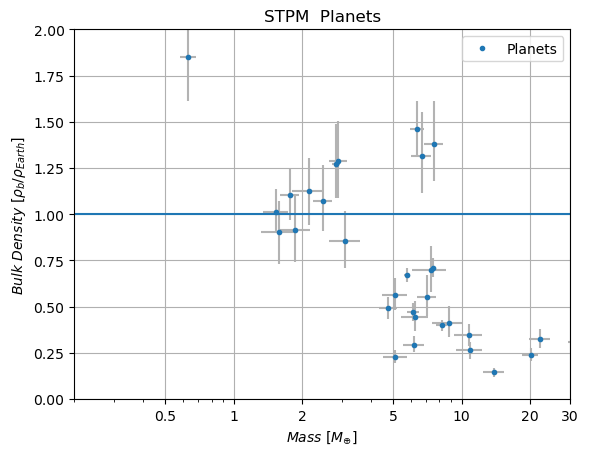

In [8]:
earth_density    = 5.51   # [g/cm**3]
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

plt.plot(mass,np.divide(density,earth_density),".",label = "Planets")
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.title("STPM  Planets")
plt.ylim(0,2)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2],["0.1","0.2","0.3","0.4","0.5","0.75","1","1.5","2"],minor=False)

leg = plt.legend()
plt.hlines(1,0,30)
plt.grid()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

## K-Means Clustering

C:\Users\silke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


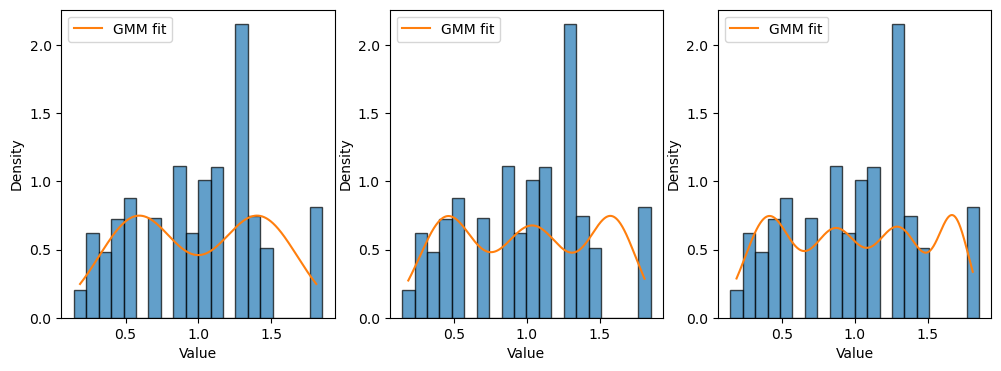

In [14]:
##### n = 2 #####
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
low     = np.divide(np.abs(density_low),earth_density)
up      = np.divide(density_up,earth_density)
weights = (low+up)/2

n, bins, _ = plt.hist(np.divide(density,earth_density), bins=20, weights=weights, alpha=0.7, edgecolor='black',density = True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
X = bin_centers.reshape(-1, 1)

# Fit a Gaussian Mixture Model
n_components = 2  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Generate points for plotting the GMM
x = np.linspace(min(X), max(X), 1000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot the histogram and the GMM fit
plt.plot(x, y, label='GMM fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

##### n = 3 #####

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
low     = np.divide(np.abs(density_low),earth_density)
up      = np.divide(density_up,earth_density)
weights = (low+up)/2

n, bins, _ = plt.hist(np.divide(density,earth_density), bins=20, weights=weights, alpha=0.7, edgecolor='black',density = True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
X = bin_centers.reshape(-1, 1)

# Fit a Gaussian Mixture Model
n_components = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Generate points for plotting the GMM
x = np.linspace(min(X), max(X), 1000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot the histogram and the GMM fit
plt.plot(x, y, label='GMM fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

##### n = 4 #####

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot
low     = np.divide(np.abs(density_low),earth_density)
up      = np.divide(density_up,earth_density)
weights = (low+up)/2

n, bins, _ = plt.hist(np.divide(density,earth_density), bins=20, weights=weights, alpha=0.7, edgecolor='black',density = True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
X = bin_centers.reshape(-1, 1)

# Fit a Gaussian Mixture Model
n_components = 4  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Generate points for plotting the GMM
x = np.linspace(min(X), max(X), 1000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot the histogram and the GMM fit
plt.plot(x, y, label='GMM fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()